In [2]:
import pandas as pd
from glob import glob

In [5]:
# cer_data 안에 모든 csv 파일 경로 list 형식
file_path = glob('cer_data/탄소배출권시세*.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path  , index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
all_data

['cer_data\\탄소배출권시세20150112_20151014.csv', 'cer_data\\탄소배출권시세20151015_20161014.csv', 'cer_data\\탄소배출권시세20161015_20171014.csv', 'cer_data\\탄소배출권시세20171015_20181014.csv', 'cer_data\\탄소배출권시세20181015_20191014.csv', 'cer_data\\탄소배출권시세20191015_20201014.csv', 'cer_data\\탄소배출권시세20201015_20211015.csv']


,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2015-10-14,KAU15,"11,300",0,0.00,0,0,0,0,0,0
1,2015-10-14,KAU16,"7,880",0,0.00,0,0,0,0,0,0
2,2015-10-14,KAU17,"7,880",0,0.00,0,0,0,0,0,0
3,2015-10-14,KCU15,"10,550",0,0.00,0,0,0,0,0,0
4,2015-10-13,KAU15,"11,300",0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8315,2020-10-16,KOC,"33,000",0,0.00,0,0,0,0,0,0
8316,2020-10-16,i-KOC,"37,600",0,0.00,0,0,0,0,0,0
8317,2020-10-15,KAU20,"23,550",-150,-0.63,"23,000","23,800","23,000","35,500","825,375,000","23,250"
8318,2020-10-15,KOC,"33,000",0,0.00,0,0,0,0,0,0


In [6]:
# 일자 형변환
all_data["일자"] = pd.to_datetime(all_data["일자"], format='%Y-%m-%d')
display(all_data.dtypes)
display(all_data.head())

일자      datetime64[ns]
종목명             object
종가              object
대비               int64
등락률            float64
시가              object
고가              object
저가              object
거래량             object
거래대금            object
가중평균            object
dtype: object

,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2015-10-14,KAU15,"11,300",0,0.0,0,0,0,0,0,0
1,2015-10-14,KAU16,"7,880",0,0.0,0,0,0,0,0,0
2,2015-10-14,KAU17,"7,880",0,0.0,0,0,0,0,0,0
3,2015-10-14,KCU15,"10,550",0,0.0,0,0,0,0,0,0
4,2015-10-13,KAU15,"11,300",0,0.0,0,0,0,0,0,0


In [7]:
# 결측치 확인
all_data.isnull().sum()

일자      0
종목명     0
종가      0
대비      0
등락률     0
시가      0
고가      0
저가      0
거래량     0
거래대금    0
가중평균    0
dtype: int64

In [8]:
all_data['종목명'].unique()

array(['KAU15', 'KAU16', 'KAU17', 'KCU15', 'KCU16', 'KOC', 'KCU17',
       'KAU18', 'KCU18', 'KAU19', 'KAU20', 'KCU19', 'i-KOC', 'i-KCU19',
       'KAU21', 'KAU22', 'KAU23', 'KAU24', 'KAU25', 'KCU21', 'KOC20-22',
       'KOC21-23', 'i-KCU21', 'i-KOC20-22', 'i-KOC21-23', 'KCU20',
       'i-KCU20'], dtype=object)

In [9]:
KAU_data = all_data[all_data['종목명'].str.contains('KAU')]
KAU_data = KAU_data.reset_index()

KAU_data['종가'] = KAU_data['종가'].str.replace(',' , '' ).astype(float)
KAU_data = KAU_data.drop('index' ,axis = 1)
KAU_data

,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2015-10-14,KAU15,11300.0,0,0.00,0,0,0,0,0,0
1,2015-10-14,KAU16,7880.0,0,0.00,0,0,0,0,0,0
2,2015-10-14,KAU17,7880.0,0,0.00,0,0,0,0,0,0
3,2015-10-13,KAU15,11300.0,0,0.00,0,0,0,0,0,0
4,2015-10-13,KAU16,7880.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4386,2020-10-21,KAU20,25000.0,0,0.00,"25,000","25,100","25,000","14,500","362,800,000","25,021"
4387,2020-10-20,KAU20,25000.0,500,2.04,"24,500","25,000","24,500","19,000","470,600,000","24,768"
4388,2020-10-19,KAU20,24500.0,400,1.66,"24,500","24,500","24,100","93,500","2,262,625,000","24,199"
4389,2020-10-16,KAU20,24100.0,550,2.34,"24,000","24,300","24,000","55,000","1,322,400,000","24,044"


In [10]:
KAU_data_grp = KAU_data.set_index(['종목명' , '일자']).groupby(level = [0,1])
display(KAU_data_grp.mean())

# KAU 년도별 종가 시가 등등 정렬
KAU_data_srt = KAU_data.set_index(['종목명' , '일자']).sort_values(by = ['종목명' , '일자']) 
KAU_data_srt = KAU_data_srt.reset_index()
KAU_data_srt

종가   대비   등락률
종목명   일자                            
KAU15 2015-01-12   8640.0  780  9.92
      2015-01-13   9500.0  860  9.95
      2015-01-14   9510.0   10  0.11
      2015-01-15   9580.0   70  0.74
      2015-01-16   9610.0   30  0.31
...                   ...  ...   ...
KAU25 2021-10-08  29400.0    0  0.00
      2021-10-12  29400.0    0  0.00
      2021-10-13  29400.0    0  0.00
      2021-10-14  29400.0    0  0.00
      2021-10-15  29400.0    0  0.00

[4391 rows x 3 columns]

,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU15,2015-01-12,8640.0,780,9.92,"7,860","8,640","7,860","1,190","9,740,400","8,185"
1,KAU15,2015-01-13,9500.0,860,9.95,"9,500","9,500","9,500",50,"475,000","9,500"
2,KAU15,2015-01-14,9510.0,10,0.11,"9,510","9,510","9,510",100,"951,000","9,510"
3,KAU15,2015-01-15,9580.0,70,0.74,0,0,0,0,0,0
4,KAU15,2015-01-16,9610.0,30,0.31,"9,610","9,610","9,610",40,"384,400","9,610"
...,...,...,...,...,...,...,...,...,...,...,...
4386,KAU25,2021-10-08,29400.0,0,0.00,0,0,0,0,0,0
4387,KAU25,2021-10-12,29400.0,0,0.00,0,0,0,0,0,0
4388,KAU25,2021-10-13,29400.0,0,0.00,0,0,0,0,0,0
4389,KAU25,2021-10-14,29400.0,0,0.00,0,0,0,0,0,0


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  f

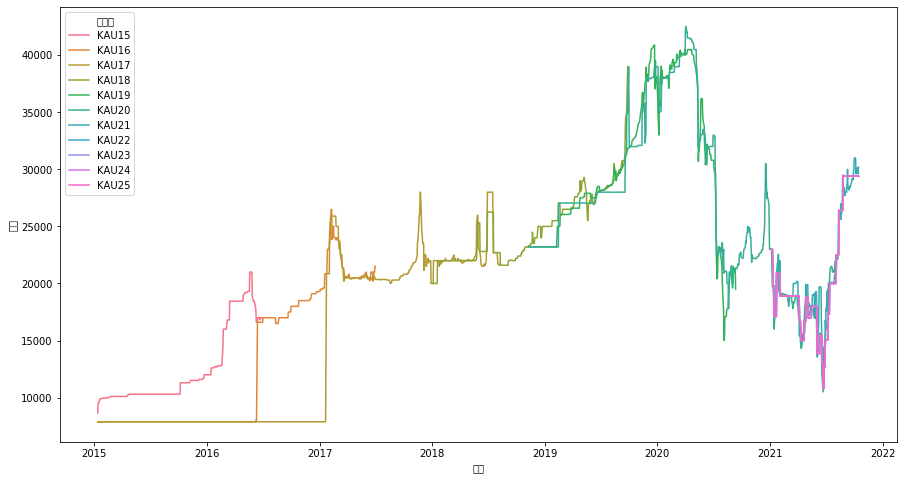

In [12]:
rcParams['figure.figsize'] = 15,8
sns.lineplot(x='일자', 
             y='종가', 
             hue='종목명',
             data=KAU_data_srt)
plt.show()

#### 1. 탄소배출권 시세만을 가지고 시계열 예측 분석 
- ARIMA 분석방법 이용
- 전통적인 시계열 예측방법 

- AR 모델 = 자기 자신의 과거를 정보로 사용하는 개념 -> 이는 현재의 상태는 이전의 상태를 참고해서 계산된다라는 아이디어를 전제
- MA 모델 = 이전 항에서의 오차를 이용 현재 항의 상태를 추론 하겠다.
- 위의 두개를 합친 것을 ARMA 모델 
- ARIMA 란 ARMA 모델에 추세 변동의 경향성 까지 반영한 방법론

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(KAU_data_srt.종가.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary()) # p>|Z| 값이 0.05 이내가 되어야 좋은 모델
# 이 모델은 연습용이라 좋은 모델이 아니다.

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [22]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화 (두번째 그래프) - 폭이 일정해야 좋은 예측 모델
residuals.plot()

NameError: name 'model_fit' is not defined

#### facebook prophet

In [ ]:
from fbprophet import Prophet

In [ ]:
#display(KAU_data_srt[['일자' , '종가']])
KAU_data_srt.rename(columns = {'일자' : 'ds' , '종가' : 'y'}, inplace = True)
KAU_data_srt_prophet = KAU_data_srt[['ds' , 'y']]
KAU_data_srt_prophet

In [ ]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
#bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(KAU_data_srt_prophet)

In [ ]:
# 5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [ ]:
#전체 데이터를 기반으로 학습한, 5일 단위의 예측 결과를 시각화
fig1 = prophet.plot(forecast_data)

In [ ]:
fig2 = prophet.plot_components(forecast_data)

In [ ]:
y = KAU_data_srt_prophet.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터입니다.

In [ ]:
from numpy import sqrt 
from sklearn.metrics import mean_squared_error, r2_score
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)
# 정확도가 낮은 0.46

### kau 년도별을 고려하지 않고 시계열 예측 한 결과들 아래에서 부터는 KAU를 나누거나 전처리해서 확인

In [14]:
KAU_data_srt
# 1차2015 - 2017
KAU_data_srt_15 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU15']
display(KAU_data_srt_15) # 20150112 - 20160630
KAU_data_srt_16 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU16']
display(KAU_data_srt_16) # 20150112 - 20170630
KAU_data_srt_17 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU17']
display(KAU_data_srt_17) # 20150112 - 20180809
# 2차 2018 - 2020
KAU_data_srt_18 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU18']
display(KAU_data_srt_18) # 20180102 - 20190930
KAU_data_srt_19 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU19']
display(KAU_data_srt_19) # 20181108 - 20200911
KAU_data_srt_20 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU20']
display(KAU_data_srt_20) # 20181108 - 20210810
# 3차 2021 - 2025
KAU_data_srt_21 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU21']
display(KAU_data_srt_21) # 20210104 - 20211015

,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU15,2015-01-12,8640.0,780,9.92,"7,860","8,640","7,860","1,190","9,740,400","8,185"
1,KAU15,2015-01-13,9500.0,860,9.95,"9,500","9,500","9,500",50,"475,000","9,500"
2,KAU15,2015-01-14,9510.0,10,0.11,"9,510","9,510","9,510",100,"951,000","9,510"
3,KAU15,2015-01-15,9580.0,70,0.74,0,0,0,0,0,0
4,KAU15,2015-01-16,9610.0,30,0.31,"9,610","9,610","9,610",40,"384,400","9,610"
...,...,...,...,...,...,...,...,...,...,...,...
358,KAU15,2016-06-24,17000.0,0,0.00,0,0,0,0,0,0
359,KAU15,2016-06-27,17000.0,0,0.00,0,0,0,0,0,0
360,KAU15,2016-06-28,17000.0,0,0.00,0,0,0,0,0,0
361,KAU15,2016-06-29,17000.0,0,0.00,0,0,0,0,0,0


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
363,KAU16,2015-01-12,7860.0,7860,0.00,0,0,0,0,0,0
364,KAU16,2015-01-13,7860.0,0,0.00,0,0,0,0,0,0
365,KAU16,2015-01-14,7860.0,0,0.00,0,0,0,0,0,0
366,KAU16,2015-01-15,7860.0,0,0.00,0,0,0,0,0,0
367,KAU16,2015-01-16,7860.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
968,KAU16,2017-06-26,21000.0,800,3.96,"21,000","21,000","21,000","45,358","918,626,000","20,253"
969,KAU16,2017-06-27,21000.0,0,0.00,0,0,0,"14,501","293,645,250","20,250"
970,KAU16,2017-06-28,21000.0,0,0.00,"21,000","21,000","21,000","33,231","697,851,000","21,000"
971,KAU16,2017-06-29,21500.0,500,2.38,"21,000","21,500","21,000","11,061","232,811,500","21,048"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
973,KAU17,2015-01-12,7860.0,7860,0.00,0,0,0,0,0,0
974,KAU17,2015-01-13,7860.0,0,0.00,0,0,0,0,0,0
975,KAU17,2015-01-14,7860.0,0,0.00,0,0,0,0,0,0
976,KAU17,2015-01-15,7860.0,0,0.00,0,0,0,0,0,0
977,KAU17,2015-01-16,7860.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1849,KAU17,2018-08-03,21700.0,0,0.00,"21,700","21,700","21,700","20,533","445,566,100","21,700"
1850,KAU17,2018-08-06,21700.0,0,0.00,"22,600","22,600","21,700","17,981","392,269,800","21,816"
1851,KAU17,2018-08-07,21600.0,-100,-0.46,"21,500","21,700","21,500","61,445","1,329,328,700","21,634"
1852,KAU17,2018-08-08,21600.0,0,0.00,0,0,0,"4,839","104,522,400","21,600"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
1854,KAU18,2018-01-02,20000.0,0,0.00,0,0,0,0,0,0
1855,KAU18,2018-01-03,20000.0,0,0.00,0,0,0,0,0,0
1856,KAU18,2018-01-04,20000.0,0,0.00,0,0,0,0,0,0
1857,KAU18,2018-01-05,20000.0,0,0.00,0,0,0,0,0,0
1858,KAU18,2018-01-08,20000.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2277,KAU18,2019-09-24,35600.0,700,2.01,"35,100","35,600","35,100","8,639","304,636,100","35,263"
2278,KAU18,2019-09-25,37000.0,1400,3.93,"36,000","37,000","36,000","16,058","582,101,900","36,250"
2279,KAU18,2019-09-26,38000.0,1000,2.70,"38,000","38,000","38,000","2,528","96,064,000","38,000"
2280,KAU18,2019-09-27,39000.0,1000,2.63,"39,000","39,000","39,000",271,"10,569,000","39,000"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
2282,KAU19,2018-11-08,23200.0,0,0.00,0,0,0,0,0,0
2283,KAU19,2018-11-09,23200.0,0,0.00,0,0,0,0,0,0
2284,KAU19,2018-11-12,23200.0,0,0.00,0,0,0,0,0,0
2285,KAU19,2018-11-13,23200.0,0,0.00,0,0,0,0,0,0
2286,KAU19,2018-11-14,23200.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2734,KAU19,2020-09-07,21000.0,0,0.00,0,0,0,"100,680","2,114,280,000","21,000"
2735,KAU19,2020-09-08,21250.0,250,1.19,0,0,0,0,0,0
2736,KAU19,2020-09-09,21250.0,0,0.00,"20,000","21,500","20,000","15,604","320,217,800","20,522"
2737,KAU19,2020-09-10,20850.0,-400,-1.88,"21,000","21,000","20,850","1,424","29,900,550","20,998"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
2739,KAU20,2018-11-08,23200.0,0,0.00,0,0,0,0,0,0
2740,KAU20,2018-11-09,23200.0,0,0.00,0,0,0,0,0,0
2741,KAU20,2018-11-12,23200.0,0,0.00,0,0,0,0,0,0
2742,KAU20,2018-11-13,23200.0,0,0.00,0,0,0,0,0,0
2743,KAU20,2018-11-14,23200.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3416,KAU20,2021-08-04,22100.0,-400,-1.78,"23,000","23,450","22,100","32,311","749,349,400","23,192"
3417,KAU20,2021-08-05,22400.0,300,1.36,"23,300","24,000","22,400","52,577","1,233,108,000","23,453"
3418,KAU20,2021-08-06,22500.0,100,0.45,"22,800","22,800","22,400","37,589","844,023,500","22,454"
3419,KAU20,2021-08-09,22500.0,0,0.00,"20,500","22,500","20,500","226,969","5,014,088,000","22,092"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
3421,KAU21,2021-01-04,23000.0,0,0.00,0,0,0,0,0,0
3422,KAU21,2021-01-05,23000.0,0,0.00,0,0,0,0,0,0
3423,KAU21,2021-01-06,23000.0,0,0.00,0,0,0,0,0,0
3424,KAU21,2021-01-07,23000.0,0,0.00,0,0,0,0,0,0
3425,KAU21,2021-01-08,23000.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3610,KAU21,2021-10-08,30100.0,500,1.69,"29,600","30,200","29,600","10,272","307,607,600","29,946"
3611,KAU21,2021-10-12,30100.0,0,0.00,"30,100","30,400","30,100","13,500","407,170,000","30,161"
3612,KAU21,2021-10-13,29600.0,-500,-1.66,"30,100","30,100","29,500","10,590","316,674,000","29,903"
3613,KAU21,2021-10-14,30100.0,500,1.69,"29,650","30,200","29,650","13,000","389,325,000","29,948"


In [15]:
sns.lineplot(x='ds', 
             y='y', 
             hue='종목명',
             data=KAU_data_srt_16)
plt.show()

ValueError: Could not interpret input 'ds'

ValueError: Could not interpret input 'ds'

C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.

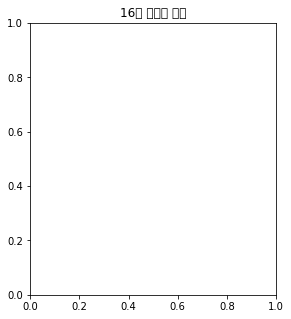

In [16]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)
ax01.set_title('16년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_16 , ax = ax01)

ax02 = fig.add_subplot(1,3,2)
ax02.set_title('17년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_17 , ax = ax02)

ax03 = fig.add_subplot(1,3,3)
ax03.set_title('18년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_18 , ax = ax03)


ValueError: Could not interpret input 'ds'

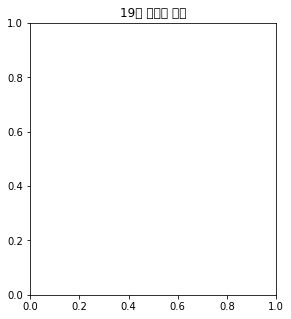

In [17]:
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)
ax01.set_title('19년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_19 , ax = ax01)

ax02 = fig.add_subplot(1,3,2)
ax02.set_title('20년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_20 , ax = ax02)

ax03 = fig.add_subplot(1,3,3)
ax03.set_title('21년 배출권 시세')
sns.lineplot(x='ds' , y = 'y' , data = KAU_data_srt_21 , ax = ax03)


### 배출권 시세를 이어붙이기 위해 계획기간 6월부터 다음 해 6월 까지로 전처리 필요
#### 16년도 17년도만 일단 하면 될듯


In [18]:
# 16  20160613 - 20170630

KAU_data_srt_16 = KAU_data_srt_16[KAU_data_srt_16['ds'] >= '2016-06-13']
KAU_data_srt_16

KeyError: 'ds'

In [19]:
# 17  20170703 - 20180809

KAU_data_srt_17 = KAU_data_srt_17[KAU_data_srt_17['ds'] > '2017-06-30']
KAU_data_srt_17

KeyError: 'ds'

In [20]:
# 18  20180702 - 20190930

KAU_data_srt_18 = KAU_data_srt_18[KAU_data_srt_18['ds'] > '2018-08-09']
KAU_data_srt_18

KeyError: 'ds'

In [131]:
KAU_data_srt_19 = KAU_data_srt_19[KAU_data_srt_19['ds'] > '2019-09-30']
KAU_data_srt_19

,종목명,ds,y,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
2502,KAU19,2019-10-01,31850.0,0,0.00,"31,850","31,850","31,850","1,500","47,775,000","31,850"
2503,KAU19,2019-10-02,31900.0,50,0.16,"31,900","31,900","31,900","3,501","111,681,900","31,900"
2504,KAU19,2019-10-04,31950.0,50,0.16,"31,950","31,950","31,950","4,000","127,800,000","31,950"
2505,KAU19,2019-10-07,32050.0,100,0.31,"32,000","32,050","32,000","6,000","192,050,000","32,008"
2506,KAU19,2019-10-08,32100.0,50,0.16,"32,100","32,100","32,100","4,500","144,450,000","32,100"
...,...,...,...,...,...,...,...,...,...,...,...
2734,KAU19,2020-09-07,21000.0,0,0.00,0,0,0,"100,680","2,114,280,000","21,000"
2735,KAU19,2020-09-08,21250.0,250,1.19,0,0,0,0,0,0
2736,KAU19,2020-09-09,21250.0,0,0.00,"20,000","21,500","20,000","15,604","320,217,800","20,522"
2737,KAU19,2020-09-10,20850.0,-400,-1.88,"21,000","21,000","20,850","1,424","29,900,550","20,998"


In [135]:
KAU_data_srt_20 = KAU_data_srt_20[KAU_data_srt_20['ds'] > '2020-09-11']
KAU_data_srt_20

,종목명,ds,y,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
3196,KAU20,2020-09-14,21300.0,-50,-0.23,"21,350","21,350","21,300","29,000","619,050,000","21,347"
3197,KAU20,2020-09-15,21300.0,0,0.00,"21,300","21,350","21,300","46,736","995,726,800","21,305"
3198,KAU20,2020-09-16,21400.0,100,0.47,"21,300","21,400","21,300","20,500","437,775,000","21,355"
3199,KAU20,2020-09-17,21500.0,100,0.47,"21,400","21,500","21,400","32,764","702,605,600","21,444"
3200,KAU20,2020-09-18,21700.0,200,0.93,"21,500","21,700","21,500","15,500","334,575,000","21,585"
...,...,...,...,...,...,...,...,...,...,...,...
3416,KAU20,2021-08-04,22100.0,-400,-1.78,"23,000","23,450","22,100","32,311","749,349,400","23,192"
3417,KAU20,2021-08-05,22400.0,300,1.36,"23,300","24,000","22,400","52,577","1,233,108,000","23,453"
3418,KAU20,2021-08-06,22500.0,100,0.45,"22,800","22,800","22,400","37,589","844,023,500","22,454"
3419,KAU20,2021-08-09,22500.0,0,0.00,"20,500","22,500","20,500","226,969","5,014,088,000","22,092"


In [139]:
KAU_data_srt_21 = KAU_data_srt_21[KAU_data_srt_21['ds'] > '2021-08-10']
KAU_data_srt_21

,종목명,ds,y,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
3573,KAU21,2021-08-11,26400.0,2400,10.00,"24,000","26,400","24,000","13,350","342,810,000","25,679"
3574,KAU21,2021-08-12,26000.0,-400,-1.52,"26,400","26,400","26,000","4,000","105,240,000","26,310"
3575,KAU21,2021-08-13,26000.0,0,0.00,"26,700","27,000","26,000","11,400","300,840,000","26,389"
3576,KAU21,2021-08-17,26000.0,0,0.00,"26,500","26,500","26,000","4,900","128,840,000","26,294"
3577,KAU21,2021-08-18,25600.0,-400,-1.54,"25,500","25,800","25,500","2,810","71,846,000","25,568"
3578,KAU21,2021-08-19,27000.0,1400,5.47,"25,500","27,000","25,500","5,300","139,520,000","26,325"
3579,KAU21,2021-08-20,26100.0,-900,-3.33,"25,500","27,000","25,500","6,500","171,730,000","26,420"
3580,KAU21,2021-08-23,27000.0,900,3.45,"26,100","27,100","26,100","9,950","266,790,000","26,813"
3581,KAU21,2021-08-24,29400.0,2400,8.89,"27,300","29,700","27,300","30,500","892,545,000","29,264"
3582,KAU21,2021-08-25,29500.0,100,0.34,"29,500","30,000","29,500","10,100","300,450,000","29,748"


In [141]:
all_KAU = [KAU_data_srt_16,KAU_data_srt_17, KAU_data_srt_18 ,KAU_data_srt_19 , KAU_data_srt_20 , KAU_data_srt_21]
all_KAU_data = pd.concat(all_KAU, ignore_index=True)
all_KAU_data

,종목명,ds,y,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU16,2016-06-13,16600.0,0,0.00,0,0,0,0,0,0
1,KAU16,2016-06-14,16600.0,0,0.00,0,0,0,0,0,0
2,KAU16,2016-06-15,16600.0,0,0.00,0,0,0,0,0,0
3,KAU16,2016-06-16,16600.0,0,0.00,0,0,0,0,0,0
4,KAU16,2016-06-17,16600.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1309,KAU21,2021-10-08,30100.0,500,1.69,"29,600","30,200","29,600","10,272","307,607,600","29,946"
1310,KAU21,2021-10-12,30100.0,0,0.00,"30,100","30,400","30,100","13,500","407,170,000","30,161"
1311,KAU21,2021-10-13,29600.0,-500,-1.66,"30,100","30,100","29,500","10,590","316,674,000","29,903"
1312,KAU21,2021-10-14,30100.0,500,1.69,"29,650","30,200","29,650","13,000","389,325,000","29,948"


C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47749 missing from current font.
  f

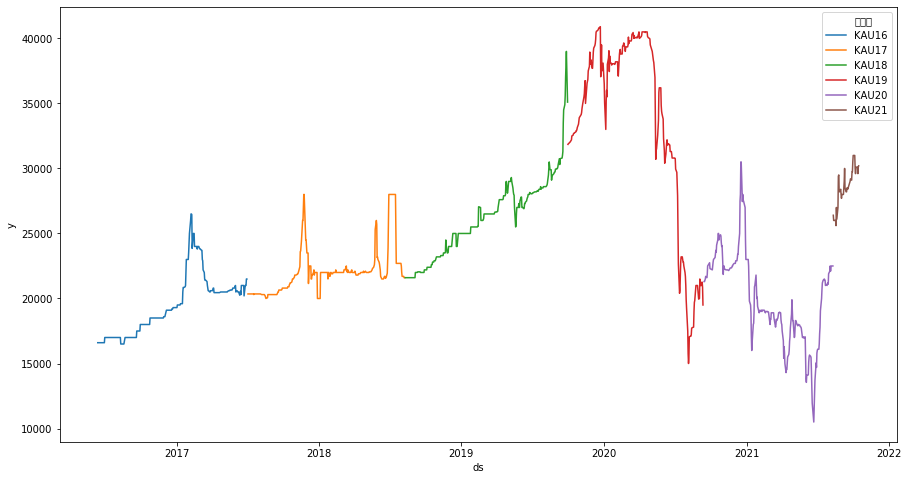

In [142]:
sns.lineplot(x='ds', 
             y='y', 
             hue='종목명',
             data=all_KAU_data)
plt.show()

In [159]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(all_KAU_data.y.values, order=(15,2,1))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary()) # p>|Z| 값이 0.05 이내가 되어야 좋은 모델
# 이 모델은 연습용이라 좋은 모델이 아니다.

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1312
Model:                ARIMA(15, 2, 1)   Log Likelihood              -10164.596
Method:                       css-mle   S.D. of innovations            558.776
Date:                Fri, 29 Oct 2021   AIC                          20365.192
Time:                        12:56:21   BIC                          20458.420
Sample:                             2   HQIC                         20400.155
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0059      0.045     -0.130      0.896      -0.095       0.083
ar.L1.D2.y      0.2022      0.028      7.327      0.000       0.148       0.256
ar.L2.D2.y      0.0592      0.028      2.106    

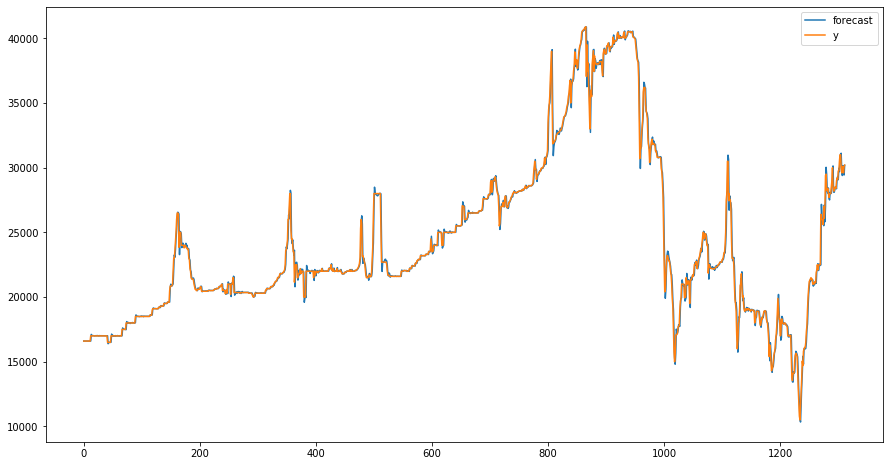

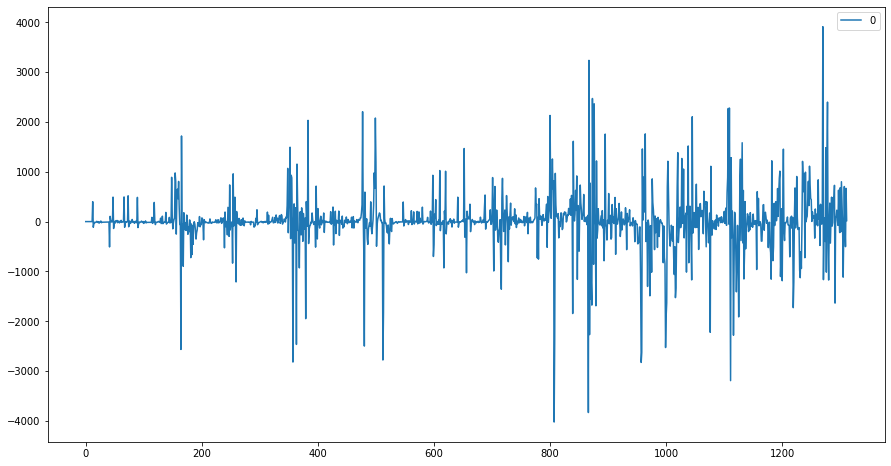

In [160]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화 (두번째 그래프) - 폭이 일정해야 좋은 예측 모델
residuals.plot()

#### facebook prophet 사용 단순 예측

In [150]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(all_KAU_data)

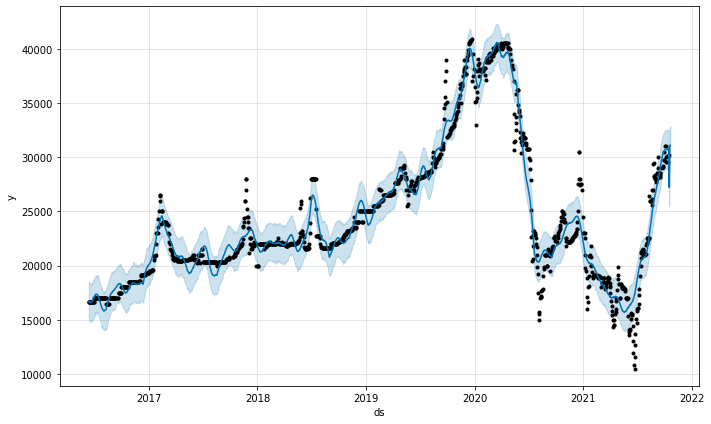

In [151]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
fig1 = prophet.plot(forecast_data)

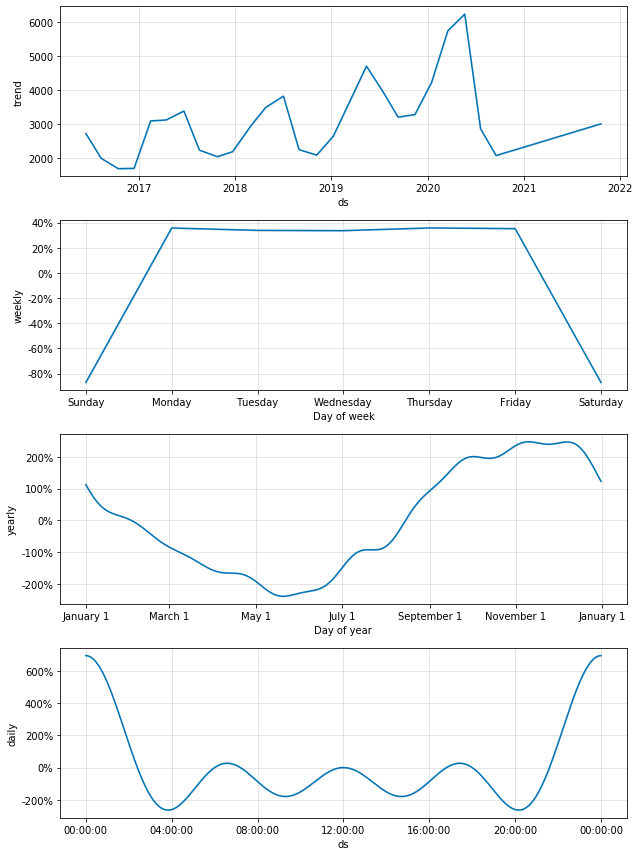

In [152]:
fig2 = prophet.plot_components(forecast_data)

In [153]:
y = all_KAU_data.y.values[5:] # 첫 5일을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[5:-5] # 첫 5일, 마지막 5일을 제외한 예측 가격 데이터입니다.

In [155]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

1361.8749621319769
0.9543287798556996


### LSTM 이용한 단순 예측

In [164]:
all_KAU_data.shape

(1314, 11)

In [165]:
all_KAU_data

,종목명,ds,y,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU16,2016-06-13,16600.0,0,0.00,0,0,0,0,0,0
1,KAU16,2016-06-14,16600.0,0,0.00,0,0,0,0,0,0
2,KAU16,2016-06-15,16600.0,0,0.00,0,0,0,0,0,0
3,KAU16,2016-06-16,16600.0,0,0.00,0,0,0,0,0,0
4,KAU16,2016-06-17,16600.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1309,KAU21,2021-10-08,30100.0,500,1.69,"29,600","30,200","29,600","10,272","307,607,600","29,946"
1310,KAU21,2021-10-12,30100.0,0,0.00,"30,100","30,400","30,100","13,500","407,170,000","30,161"
1311,KAU21,2021-10-13,29600.0,-500,-1.66,"30,100","30,100","29,500","10,590","316,674,000","29,903"
1312,KAU21,2021-10-14,30100.0,500,1.69,"29,650","30,200","29,650","13,000","389,325,000","29,948"


In [1]:
all_KAU_data_lstm = all_KAU_data.set_index('ds')

NameError: name 'all_KAU_data' is not defined

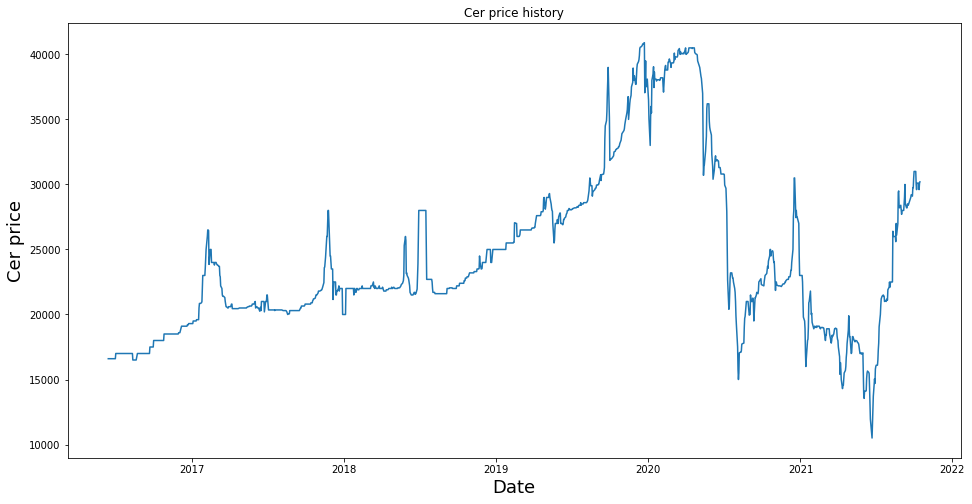

In [169]:
plt.figure(figsize = (16 , 8))
plt.title('Cer price history')
plt.plot(all_KAU_data_lstm['y'])
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Cer price' , fontsize = 18)
plt.show()